In [ ]:
!pip install datasets
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
 

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 24.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import numpy as np
nlp = spacy.load("en_core_web_md")

In [ ]:
from datasets import load_dataset
import pandas as pd

In [ ]:
ds = load_dataset("gfissore/arxiv-abstracts-2021")

README.md:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

arxiv-abstracts.jsonl.gz:   0%|          | 0.00/940M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1999486 [00:00<?, ? examples/s]

In [ ]:
quant_ph_data = ds['train'].filter(lambda x: 'quant-ph' in x['categories'])

Filter:   0%|          | 0/1999486 [00:00<?, ? examples/s]

In [ ]:
import random
quant_ph_data_list = list(quant_ph_data)
sampled_data = random.sample(quant_ph_data_list, 1000)

In [ ]:
sampled_data_df = pd.DataFrame(sampled_data)

In [ ]:
sampled_data_df.to_csv('sampled_data.csv', index=False)

In [ ]:
titles=[x['title'] for x in  sampled_data]

In [ ]:
abstracts = [x['abstract'] for x in sampled_data]

In [ ]:
text = [
    f"{x['title']}. {x['abstract']}" for x in sampled_data
]

In [ ]:
with open('sampled_abstracts.txt', 'w') as f:
    for abstract in text:
        f.write(abstract + '\n')

In [ ]:
document_vectors = []
for data in text:
    doc = nlp(data)
    document_vectors.append(doc.vector)
document_matrix = np.array(document_vectors)


In [ ]:
np.save("document_matrix1.npy", document_matrix)

In [ ]:
similarity_matrix = np.dot(document_matrix, document_matrix.T)

In [ ]:
np.save("similarity_matrix1.npy", similarity_matrix)

In [ ]:
import random
sample_size = int(len(document_matrix) * 0.02)
sample_indices = random.sample(range(len(document_matrix)), sample_size)
sampled_document_matrix = document_matrix[sample_indices, :]

In [ ]:
sample_similarity_matrix = np.dot(sampled_document_matrix, sampled_document_matrix.T)
similarity_values = sample_similarity_matrix[np.triu_indices(sample_size, k=1)]

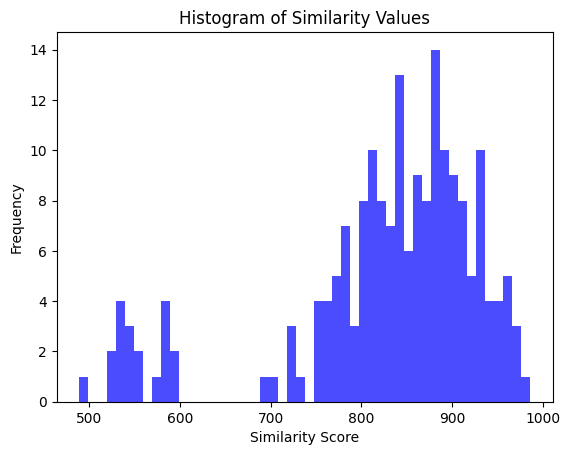

In [ ]:
import matplotlib.pyplot as plt
plt.hist(similarity_values, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Similarity Values")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
threshold = np.percentile(similarity_values, 98)
print(f"Chosen Threshold: {threshold}")


Chosen Threshold: 966.6579821777344


In [ ]:
adjacency_matrix = np.where(similarity_matrix >= threshold, 1, 0)
np.fill_diagonal(adjacency_matrix, 0)


In [ ]:
non_zero_edges = np.sum(adjacency_matrix)
total_possible_edges = adjacency_matrix.shape[0] * (adjacency_matrix.shape[0] - 1)
sparsity = (non_zero_edges / total_possible_edges) * 100
print(f"Sparsity of the graph: {sparsity:.2f}%")


Sparsity of the graph: 10.67%


In [ ]:
size = adjacency_matrix.shape

In [ ]:
print(size)

(1000, 1000)


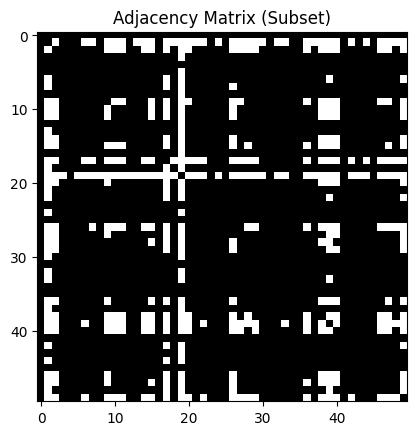

In [ ]:
plt.imshow(adjacency_matrix[:50, :50], cmap='gray', interpolation='nearest')
plt.title("Adjacency Matrix (Subset)")
plt.show()


In [ ]:
np.save("adjacency_matrix1.npy", adjacency_matrix)


In [ ]:
actual_document_ids = sampled_data_df['id'].tolist()
assert len(actual_document_ids) == len(document_matrix), "Mismatch in number of IDs and rows!"
np.save("document_ids.npy", actual_document_ids)

In [ ]:

nodes_data = sampled_data_df[['id', 'title']]
nodes_data.to_csv("nodes.csv", index=False)

In [ ]:
import numpy as np



# Count the number of 1s
num_ones = np.count_nonzero(adjacency_matrix == 1)

# Print the result
print("Number of 1s in the matrix:", num_ones)

Number of 1s in the matrix: 106638


In [ ]:
import numpy as np

# Assuming your matrix is stored in a variable called 'adjacency_matrix'
# If it's not, replace 'adjacency_matrix' with the actual variable name

# Count the number of 1s
num_ones = np.count_nonzero(adjacency_matrix == 1)

# Print the result
print("Number of 1s in the matrix:", num_ones)

Number of 1s in the matrix: 0


In [ ]:
edges = []
num_documents = adjacency_matrix.shape[0]

for i in range(num_documents):
    for j in range(i + 1, num_documents):  # Avoid duplicate edges (i, j) and (j, i)
        if adjacency_matrix[i][j] == 1:  # Similarity above the threshold
            source_id = actual_document_ids[i]  # Get actual document ID for source
            target_id = actual_document_ids[j]  # Get actual document ID for target
            edges.append([source_id, target_id])

# Create a DataFrame for the edges
edges_df = pd.DataFrame(edges, columns=['source', 'target'])

# Save the edges DataFrame to a CSV file
edges_df.to_csv('edges.csv', index=False)